<a href="https://colab.research.google.com/github/Sushila-Phogat/Data-science-with-Python/blob/master/breast_cancer_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd

colnames=['Class', 'age', 'menopause', 'tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df2=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/CE888/master/Assignment1/data/breast-cancer.data', names=colnames, header=None)

df2.head(5)


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [62]:
df2.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [63]:
df2['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [64]:
df2.replace({'no-recurrence-events': 0, 'recurrence-events': 1}, inplace=True)
df2.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [0]:

df2=df2.sort_values(by='Class', ascending=True)[43:-1]

In [66]:
from statistics import *

clas_mean= df2['Class'].mean()
clas_mean

0.34710743801652894

In [67]:
clas_std = df2['Class'].std()
clas_std

0.4770369089237928

In [0]:
df2['z-score'] = (df2['Class']-clas_mean)/clas_std

In [69]:
values_plus_minus_one_z_score = len(df2[df2['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df2)*100
percent_values_plus_minus_one_z_score

65.28925619834712

In [36]:
158/243

0.6502057613168725

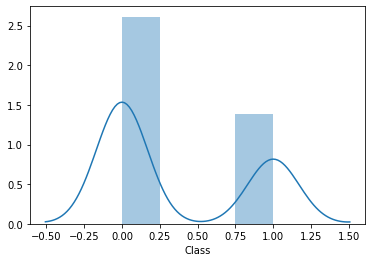

In [72]:
import seaborn as sns

sns.distplot(df2['Class'])


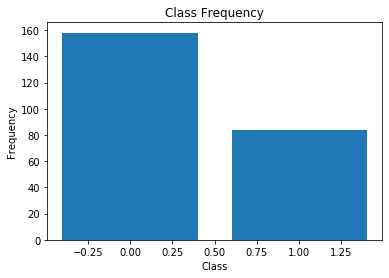

In [73]:
import numpy as np
import matplotlib.pyplot as plt

classes = df2['Class'].values
unique, counts = np.unique(classes, return_counts=True)


plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

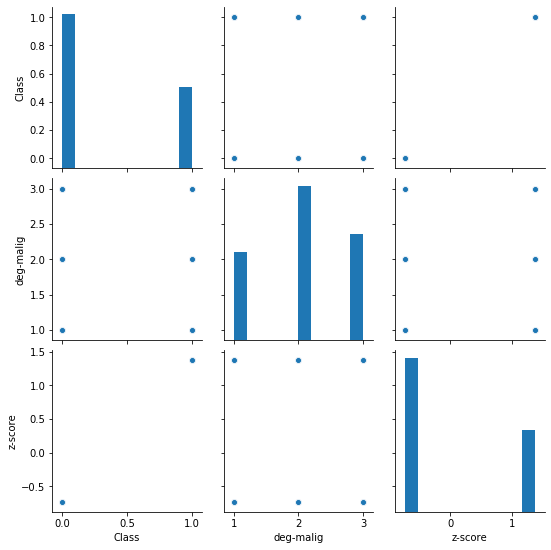

In [74]:

sns.pairplot(df2)